In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv("../../../csv/v2/040_gardiner_count_processed.csv.zip")
df.head()

,detector_id,datetime_bin,volume_15min,number_of_lanes,primary_road,direction,latitude,longitude,detector_loc
0,DW0040DWG,2022-08-11 15:00:00,160,3,F G Gardiner Xy W,W,43.638046,-79.396634,W of SPADINA AV
1,DW0126DEG,2022-08-11 15:00:00,170,3,F G Gardiner Xy E,E,43.638420,-79.451353,W of RONCESVALLES AVE
2,DW0140DEG,2022-08-11 15:00:00,169,3,F G Gardiner Xy E,E,43.637296,-79.464739,E of ELLIS AVE
3,DW0140DWG,2022-08-11 15:00:00,123,3,F G Gardiner Xy W,W,43.637449,-79.464777,E of ELLIS AVE
4,DW0201DWG,2022-08-11 15:00:00,134,3,F G Gardiner Xy W,W,43.614486,-79.546012,At THE EAST MALL


# Separate datetime into multiple date-related attributes

In [3]:
df["datetime_bin"] = pd.to_datetime(df["datetime_bin"],utc=True)
df["year"] = df["datetime_bin"].dt.year
df["month"] = df["datetime_bin"].dt.month
df["day"] = df["datetime_bin"].dt.day
df["dow"] = df["datetime_bin"].dt.day_name()
df["time_of_day"] = df["datetime_bin"].dt.time
df["hour"] = df["datetime_bin"].dt.hour
df.head()

,detector_id,datetime_bin,volume_15min,number_of_lanes,primary_road,direction,latitude,longitude,detector_loc,year,month,day,dow,time_of_day,hour
0,DW0040DWG,2022-08-11 15:00:00+00:00,160,3,F G Gardiner Xy W,W,43.638046,-79.396634,W of SPADINA AV,2022,8,11,Thursday,15:00:00,15
1,DW0126DEG,2022-08-11 15:00:00+00:00,170,3,F G Gardiner Xy E,E,43.638420,-79.451353,W of RONCESVALLES AVE,2022,8,11,Thursday,15:00:00,15
2,DW0140DEG,2022-08-11 15:00:00+00:00,169,3,F G Gardiner Xy E,E,43.637296,-79.464739,E of ELLIS AVE,2022,8,11,Thursday,15:00:00,15
3,DW0140DWG,2022-08-11 15:00:00+00:00,123,3,F G Gardiner Xy W,W,43.637449,-79.464777,E of ELLIS AVE,2022,8,11,Thursday,15:00:00,15
4,DW0201DWG,2022-08-11 15:00:00+00:00,134,3,F G Gardiner Xy W,W,43.614486,-79.546012,At THE EAST MALL,2022,8,11,Thursday,15:00:00,15


# ANOVA (Analysis Of Variance) test
- Null hypothesis: numerical and categorical values are not correlated
- P-value: The probability of Null hypothesis being true
- Accept Null hypothesis if P-value>0.05. Means variables are NOT correlated
- Reject Null hypothesis if P-value<0.05. Means variables are correlated

In [4]:
from scipy.stats import f_oneway

## Between count (numerical) and day of week (categorical)

In [5]:
category_group_lists = df[["volume_15min","dow"]].groupby('dow')['volume_15min'].apply(list)
anova_results = f_oneway(*category_group_lists)
print("P-value:",anova_results[1])
print("Count and day of week are NOT correlated") if anova_results[1] > 0.05 else print("Count and day of week ARE correlated")

P-value: 4.037702865282701e-198
Count and day of week ARE correlated


- P-value: 4.037702865282701e-198
- Count and day of week ARE correlated

## Between count (numerical) and direction (categorical)

In [6]:
category_group_lists = df[["volume_15min","direction"]].groupby('direction')['volume_15min'].apply(list)
anova_results = f_oneway(*category_group_lists)
print("P-value:",anova_results[1])
print("Count and direction are NOT correlated") if anova_results[1] > 0.05 else print("Count and direction ARE correlated")

P-value: 1.143923737219441e-279
Count and direction ARE correlated


- P-value: 1.143923737219441e-279
- Count and direction ARE correlated

## Between count (numerical) and detector location (categorical)

In [7]:
category_group_lists = df[["volume_15min","detector_loc"]].groupby('detector_loc')['volume_15min'].apply(list)
anova_results = f_oneway(*category_group_lists)
print("P-value:",anova_results[1])
print("Count and detector location are NOT correlated") if anova_results[1] > 0.05 else print("Count and detector location ARE correlated")

P-value: 0.0
Count and detector location ARE correlated


- P-value: 0.0
- Count and detector location ARE correlated

## Between count (numerical) and day of week, direction & detector location (categorical)

In [8]:
category_group_lists = df[["volume_15min","dow", "direction", "detector_loc"]].groupby(["dow","direction","detector_loc"])['volume_15min'].apply(list)

anova_results = f_oneway(*category_group_lists)

print("P-value:",anova_results[1])
print("Count and day of week are NOT correlated") if anova_results[1] > 0.05 else print("Count and day of week ARE correlated")

P-value: 0.0
Count and day of week ARE correlated


# Calculate Pearson correlation of numerical features

In [9]:
data_to_correlate = df[["volume_15min", "number_of_lanes","month","day","hour"]]

corr_mat = data_to_correlate.corr()

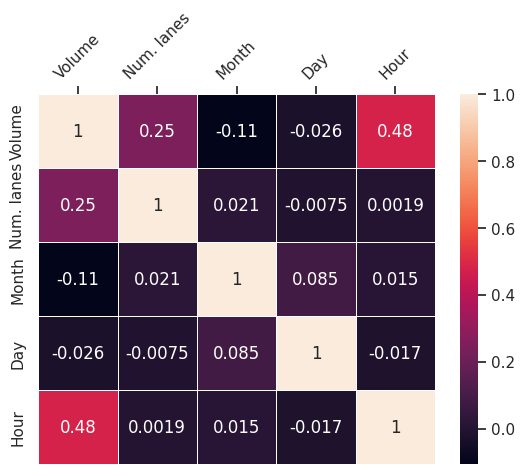

In [10]:
labels=["Volume", "Num. lanes", "Month", "Day", "Hour"]

ax = sns.heatmap(corr_mat,annot=True,linewidth=0.5,xticklabels=labels,yticklabels=labels)
ax.xaxis.tick_top()
plt.xticks(rotation=45)

plt.savefig("./plots/020_correlations.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/020_correlations.png", bbox_inches="tight")
plt.savefig("./plots/020_correlations.pdf", bbox_inches="tight")

- Volume and num lanes: larger roads (more lanes) support more vehicles
- Volume and month: number of vehicles decrease as we get closer to December
- Volume and hour: as the day goes by (hour goes from 0 towards 23), the volume increases
- Should I keep "month" and "day"?